# Análise dos Pares
Após identificar os pares em Cointegration.ipynb, é hora de analisar quais os melhores estão sinalizando entrada

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
%run Cointegration.py

# Funtions

In [59]:
def plot_last_days(data, y_symbol, x_symbol):
    index = len(data)-8
    fig2, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))
    for i, ax in enumerate(axes.flatten()):
        index+=1
        last_data = data.iloc[:index].copy()
        label = last_data.index[-1]
        subshow(last_data, y_symbol, x_symbol, ax, title=label)

def subshow(data, y_symbol, x_symbol, ax, period=250, title=''):
    y, x = getvalues_by_period(data[y_symbol], data[x_symbol], period)
    model= model_ols(y, x)
    result = zscore(model.resid)
    std = result.std()
    result.plot(ax=ax)
    #ax.plot(result)
    if(title == ''):
        ax.set_title('{} / {}'.format(y_symbol, x_symbol))
    else:
        ax.set_title(title)
    ax.margins(0.1)
    ax.set_xlabel('')

    ax.axhline(0, color='black',label='mean')
    ax.axhline(2*std, color='red', linestyle='--', linewidth=2)
    ax.axhline(-2*std, color='green', linestyle='--', linewidth=2)

In [3]:
path_data_cart = 'datasets/data_cart.csv'

In [43]:
data = pd.read_csv(path_data_cart, index_col=0)
pairs = pd.read_csv('datasets/cointegrated_pairs.csv')

print('{} to {}'.format(data.index[0], data.index[-1]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

12/04/2019 to 26/06/2020
data: (300, 71)
pairs: (1066, 13)


Procura pares que estão quase no ponto de entrada 95% de distância da média e 5% próximo da zona -2 e +2

In [44]:
pairs_signal = pairs.loc[(pairs['Signal'] >= 0.95)].copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal.shape

(25, 13)

In [45]:
#signal2 = pd.read_csv('datasets/sinais/sinais_25062020.csv')

In [46]:
pairs_signal = pairs_signal.loc[(pairs_signal['PeriodQt'] > 2)].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CPFE3,ENGI11,0.000094,99,0.564880,5,0.226434,0.954111,1.110346,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CYRE3,LREN3,0.010324,95,0.791469,5,0.275411,0.963727,1.184884,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,B3SA3,BPAC11,0.041758,95,0.281372,8,0.339061,0.824582,0.988170,Short/Long,5,"100,200,220,240,250"
3,250,B3SA3,SBSP3,0.024049,95,0.494425,8,0.244095,0.812388,1.301807,Short/Long,3,"220,240,250"
4,250,BRAP4,TAEE11,0.017235,95,2.045478,8,0.311625,0.808437,0.986839,Short/Long,6,"160,180,200,220,240,250"
5,200,ENBR3,GOAU4,0.019836,95,1.176109,9,0.276150,0.896475,0.959581,Long/Short,6,"100,120,140,160,180,200"
6,250,IGTA3,USIM5,0.040829,95,4.352774,9,0.288569,0.933737,1.531298,Long/Short,3,"220,240,250"
7,200,BRAP4,UGPA3,0.041861,95,0.787879,12,0.241676,0.816194,1.049514,Short/Long,3,"140,180,200"
8,250,CYRE3,SBSP3,0.028656,95,0.712322,13,0.232076,0.903395,0.952527,Long/Short,3,"220,240,250"
9,240,GNDI3,TAEE11,0.027070,95,4.600665,14,0.306884,0.751806,0.973784,Short/Long,6,"140,160,180,200,220,240"


In [ ]:
#pairs_signal.to_csv('datasets/sinais/sinais_29062020.csv', index=False)

In [47]:
#data[['B3SA3', 'BPAC11']].to_excel('datasets/test.xlsx')

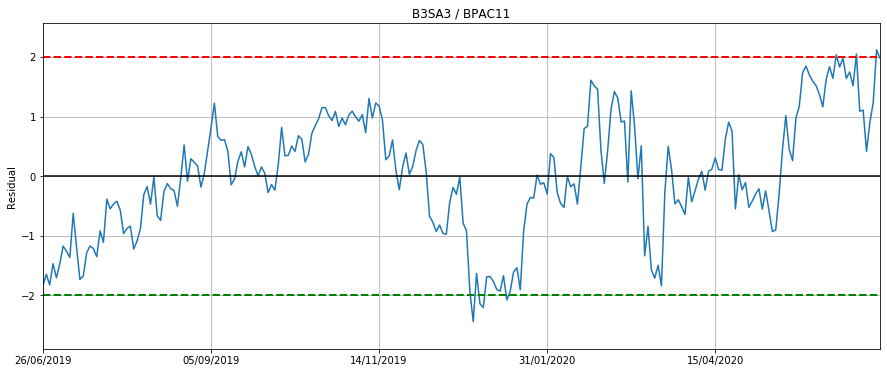

In [48]:
show(data, 'B3SA3', 'BPAC11')

### Plota todos os sinais

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


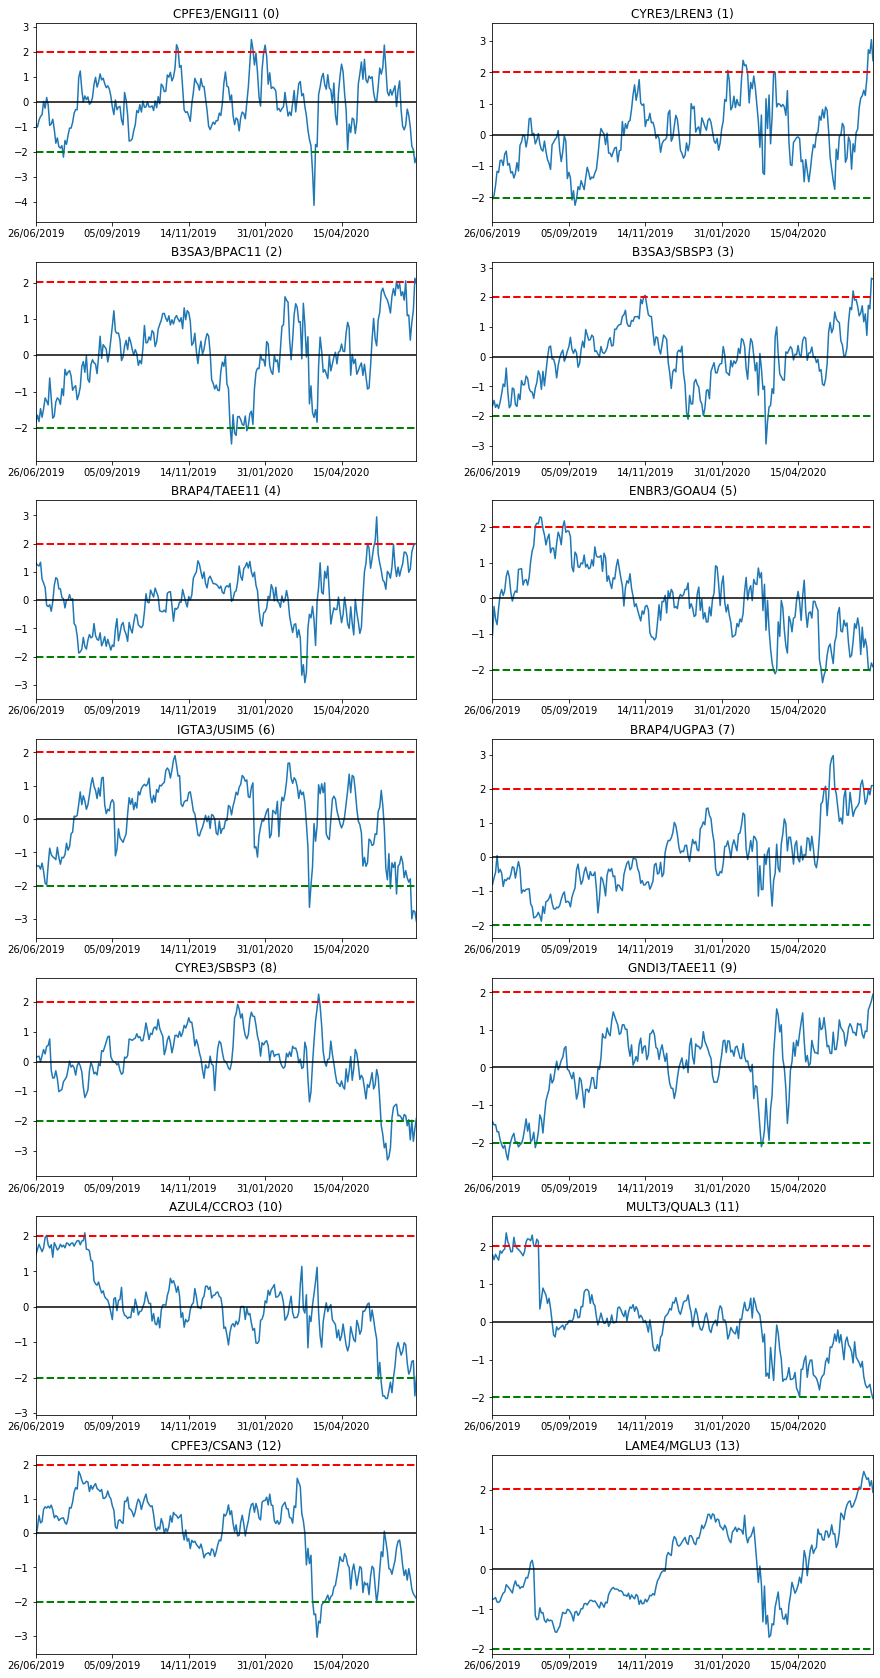

In [60]:
fig2, axes = plt.subplots(nrows=int((pairs_signal.shape[0]/2)), ncols=2, figsize=(15, 30))
for i, ax in enumerate(axes.flatten()):
    row = pairs_signal.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    
    subshow(data, y_symbol, x_symbol, ax, title='{}/{} ({})'.format(y_symbol, x_symbol, i))
    #plt.tight_layout()

In [67]:
#pairs_signal.iloc[[0,1,2,6,9,11]].to_csv('datasets/oper/29062020.csv', index=False)

# Análise das operações abertas

In [69]:
operation = pd.read_csv('datasets/oper/29062020.csv')
operation

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CPFE3,ENGI11,0.000094,99,0.564880,5,0.226434,0.954111,1.110346,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CYRE3,LREN3,0.010324,95,0.791469,5,0.275411,0.963727,1.184884,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,B3SA3,BPAC11,0.041758,95,0.281372,8,0.339061,0.824582,0.988170,Short/Long,5,"100,200,220,240,250"
3,250,IGTA3,USIM5,0.040829,95,4.352774,9,0.288569,0.933737,1.531298,Long/Short,3,"220,240,250"
4,240,GNDI3,TAEE11,0.027070,95,4.600665,14,0.306884,0.751806,0.973784,Short/Long,6,"140,160,180,200,220,240"
5,180,MULT3,QUAL3,0.031236,95,0.757107,20,0.395499,0.823725,1.014372,Long/Short,3,"120,160,180"


In [64]:
"""excel = data[293:][['AZUL4', 'BBSE3']].copy()
excel = excel.iloc[::-1]
excel[0:10].to_excel('datasets/test.xlsx')"""

"excel = data[293:][['AZUL4', 'BBSE3']].copy()\nexcel = excel.iloc[::-1]\nexcel[0:10].to_excel('datasets/test.xlsx')"

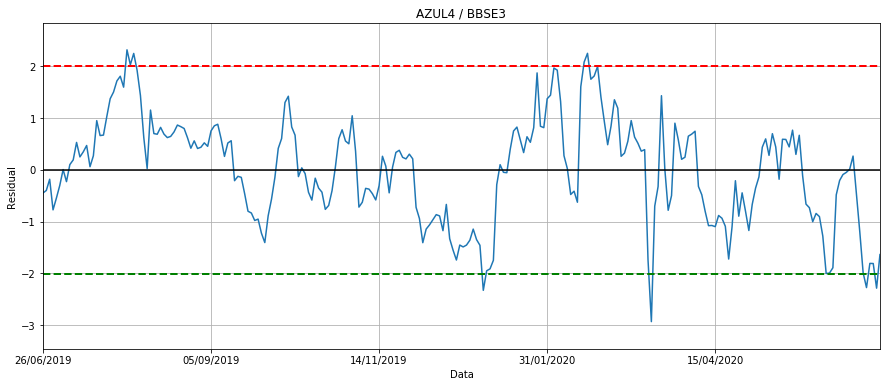

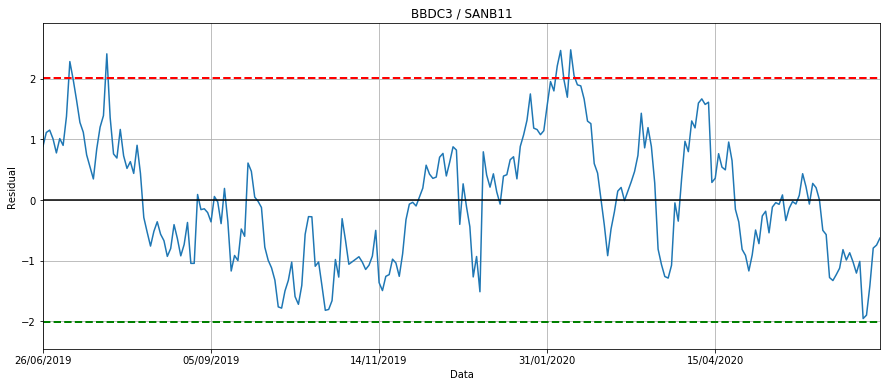

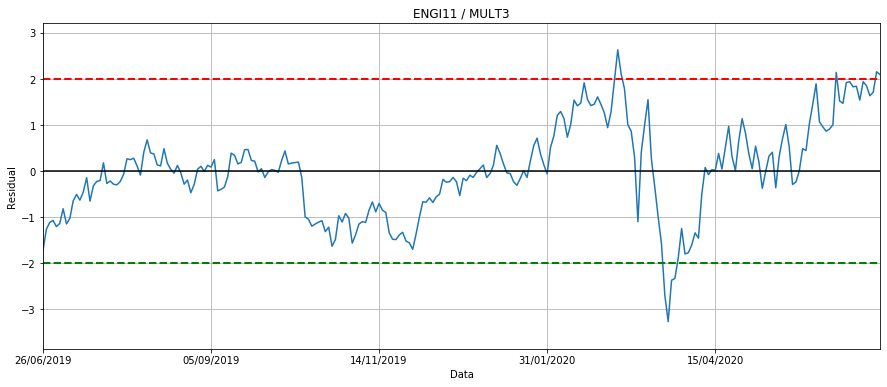

In [65]:
show(data, 'AZUL4', 'BBSE3')
show(data, 'BBDC3', 'SANB11')
show(data, 'ENGI11', 'MULT3')

In [52]:
result = model_ols(data['BBDC3'], data['SANB11'])
result.params

const    -1.104315
SANB11    0.733522
dtype: float64

In [53]:
result.resid[::-1][0:4]

Data
26/06/2020   -0.603700
25/06/2020   -0.713870
24/06/2020   -0.764445
23/06/2020   -1.368711
dtype: float64

In [54]:
dfres = pd.DataFrame()
dfres['resid'] = result.resid

In [55]:
dfres['mean'] = result.resid.rolling(window=21, center=False).mean()
dfres.fillna(value=0, inplace=True)

In [56]:
dfres['%'] = (dfres['mean'] / dfres['resid'])-1
dfres[284:]

,resid,mean,%
Data,,,
04/06/2020,-1.234097,-0.136761,-0.889181
05/06/2020,-1.280227,-0.185115,-0.855405
08/06/2020,-1.180453,-0.232487,-0.803052
09/06/2020,-1.077704,-0.258363,-0.760265
10/06/2020,-0.783409,-0.289824,-0.630048
12/06/2020,-0.952665,-0.332712,-0.650757
15/06/2020,-0.837882,-0.368982,-0.559625
16/06/2020,-0.982750,-0.419239,-0.573402
17/06/2020,-1.160199,-0.458472,-0.604834


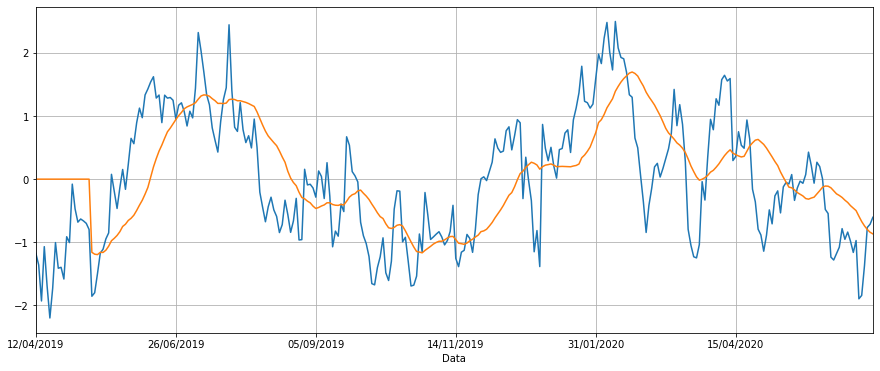

In [57]:
plt.figure(figsize=(15, 6))
dfres['resid'].plot()
dfres['mean'].plot()
plt.grid(True)